# Module 5

Welcome back! As a reminder, last week we went over some more filtering and some basics about visualization. Today, we'll be reviewing the visualizations we went over last time, then going over another form of visualization: the histogram. 

Again, please work with a partner for this module.

Before starting, run the cell below:

In [1]:
from datascience import *
import numpy as np
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Scatter Plots

Scatter plots are graphs that help us visualize associations between two *numerical* variables. 

For example, say we wanted to see if there's an association between the number of inmates and the number of supervised adults in correctional facilities. We could use a scatter plot as follows.

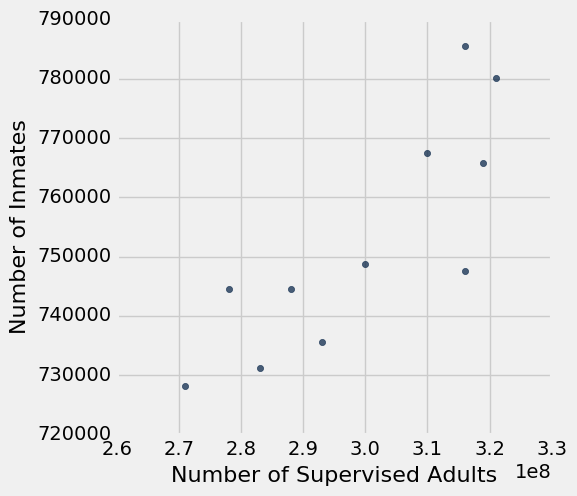

In [2]:
inmates_correctional = Table.read_table('inmates_correctional.csv')
inmates_correctional = inmates_correctional.drop('Year') #dropping the year column, we don't want this in our plot

inmates_correctional.scatter('Number of Supervised Adults')

In the above chart, notice a few things:
1. Both of our axes were made up of numerical variables (we're dealing with numbers on both axes). Scatter plots are most powerful when we're using numbers. 
2. In our scatter command, we only needed to specify the variable we wanted on the x-axis. Python automatically filled out the y-axis based on our data table. 
3. As the number of supervised adults increase, so do the number of inmates (for the most part). In this case, we'd say that there is a positive association between the two. Below is a handy graphic that helps you visualize what associations look like. 

![Correlations](https://s-media-cache-ak0.pinimg.com/originals/7e/3e/d1/7e3ed1517ba2884bf4e7a3d9cd5af8a8.jpg)

Now, try it for yourself! 

Load the data table called `ca_naturalization.csv` and save it as a variable. Then, make a scatter plot of the number of naturalized people in California on the x-axis and the number of total naturalized people in the US on the y-axis. 

Remember, here is the syntax for creating a scatter plot: 

`table_name.scatter('x-axis_variable')` 

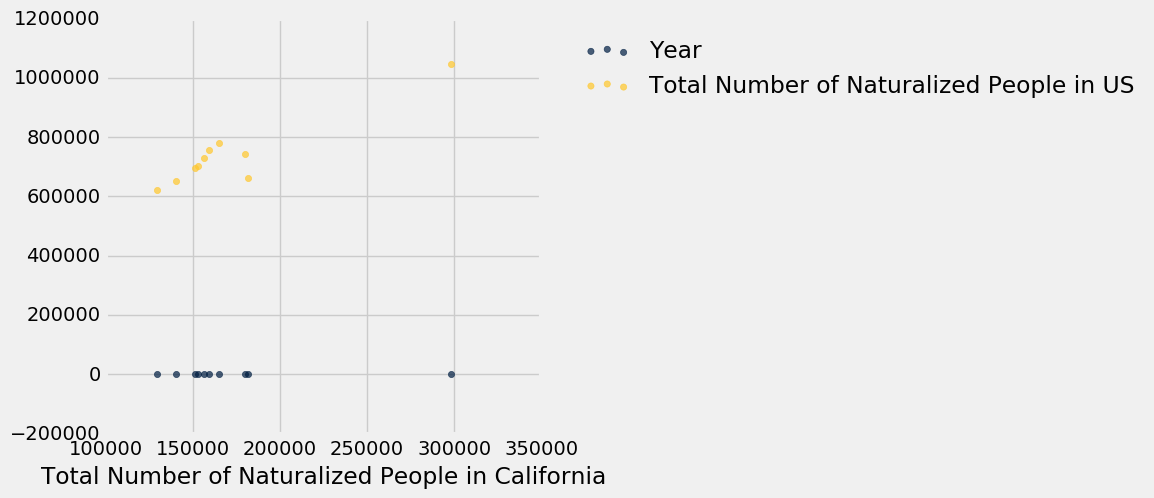

In [6]:
ca_naturalization = Table.read_table('ca_naturalization.csv')
ca_naturalization.scatter('Total Number of Naturalized People in California')


Now, if you did this without dropping the year column, you may have noticed that you have two different colored dots on your scatter plot. This is what happens when we have multiple numerical variables in our data table (in this case, we had `Year` and `Total Number of Naturalized People in US`. 

If you just want to plot one of these variables, you need to remove the other column from your data table. We can do that using the `drop` method. Here is the syntax for `drop`:

`table_name.drop('column_name')`

Once you drop the `Year` column from your data table, you should be able to create a plot that only focuses on one other variable.

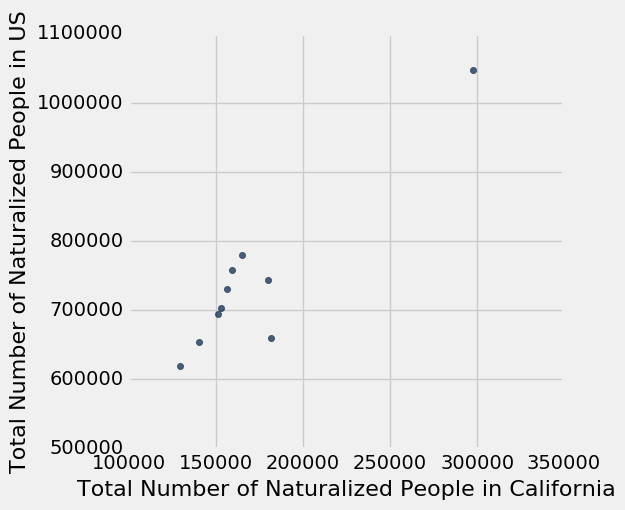

In [4]:
ca_naturalization.drop('Year').scatter('Total Number of Naturalized People in California')

Now, let's use this graph to make some conclusions about our data. Answer the following questions in the cell below: 
1. What is this graph helping us visualize? 
2. Is there a positive, negative, or no correlation between our two variables?
3. We notice that there's a dip in our graph- it goes up at the beginning, then drops significantly. What could've caused this? Feel free to examine the data table to answer this question.
4. What information are we losing in creating such a graph? 
5. How could we have chosen our x-axis better so we got more information out of this graph?

Answers: 
1. 
2. 
3. 
4. 
5. 

## Line Graphs

Now, we'll be covering line graphs. Line graphs are also used on numerical data, and in a lot of ways, they're very similar to scatter plots. What sets the two apart is that line graphs help us visualize change while scatter plots help us visualize association.

Here's what a line graph on the same data (with the same axes) would look like:

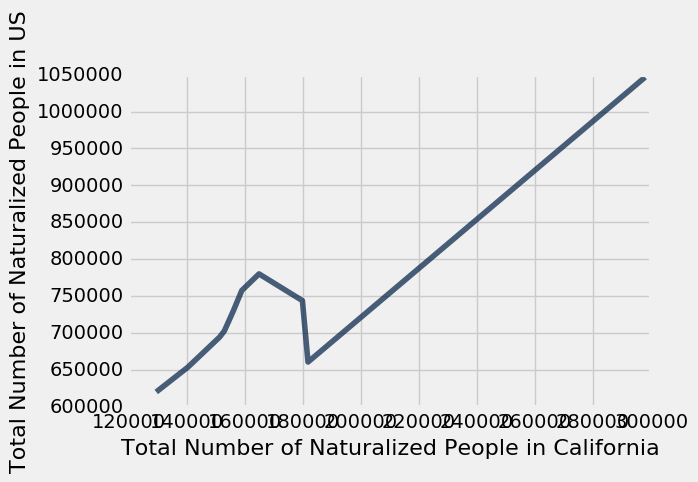

In [7]:
ca_naturalization_line = Table.read_table('ca_naturalization.csv')
ca_naturalization_line.drop('Year').plot('Total Number of Naturalized People in California')

Now, answer the following question about this visualization:
How does this visualization differ from the scatter plot visualization? In what ways is it stronger? In what ways is it weaker?

Answer: 

Now, say we wanted to visualize the change over time in naturalization numbers. In the cell below, create a plot that puts the year on the x-axis. 

Here's the syntax for line graphs:

`table_name.plot('x-axis_variable')`

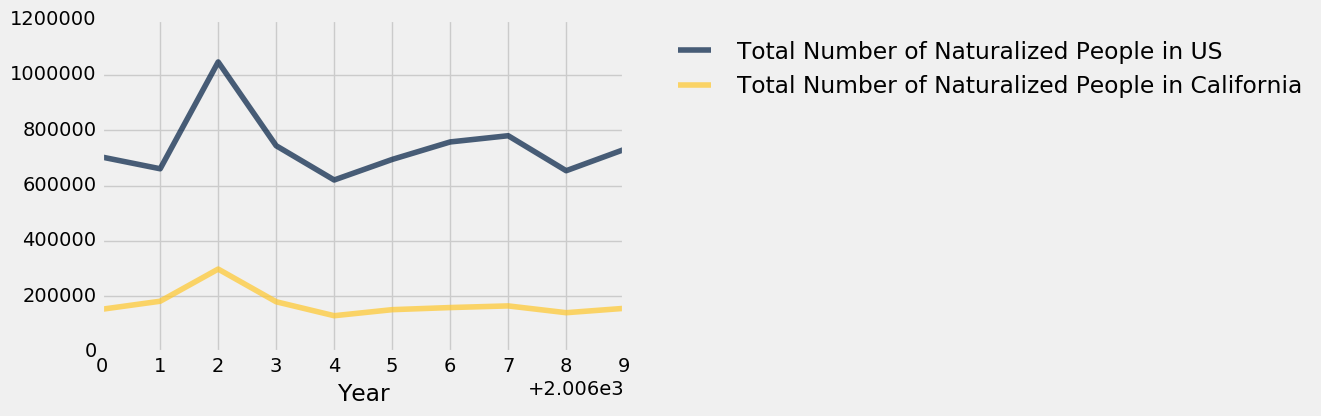

In [17]:
ca_naturalization_line.plot('Year')

Again, we see that when we don't tell Python which data to use for the y-axis, it'll use all numerical variables it can find. In this case, this creates a pretty powerful visualization that shows us the trends and changes in both variables over time.

In the cell below, answer the following questions:
1. How did the number of naturalized people in the US change over time?
2. Does the pattern in California's naturalization follow that of the US?

Answers: 
1. 
2. 

Now, what if we wanted to just see trends for the total number of naturalized people in the US? Using the same method as you did for scatter plots, create a plot that only visualizes the total number of naturalized people in the US.

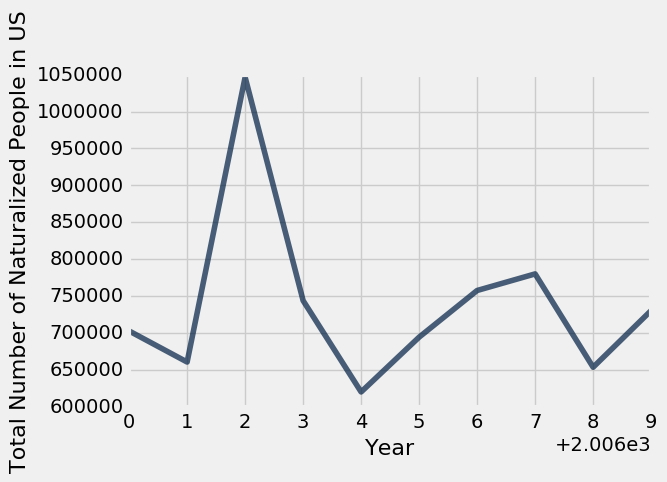

In [15]:
ca_naturalization_line.drop('Total Number of Naturalized People in California').plot('Year')

## Bar Charts

Now, we're going to shift our focus to categorical distributions. Bar charts help us visualize categorical data. For example, say we wanted to visualize the number of people visualized by state in 2015. Run the cell below to see what the plot for that data would look like:

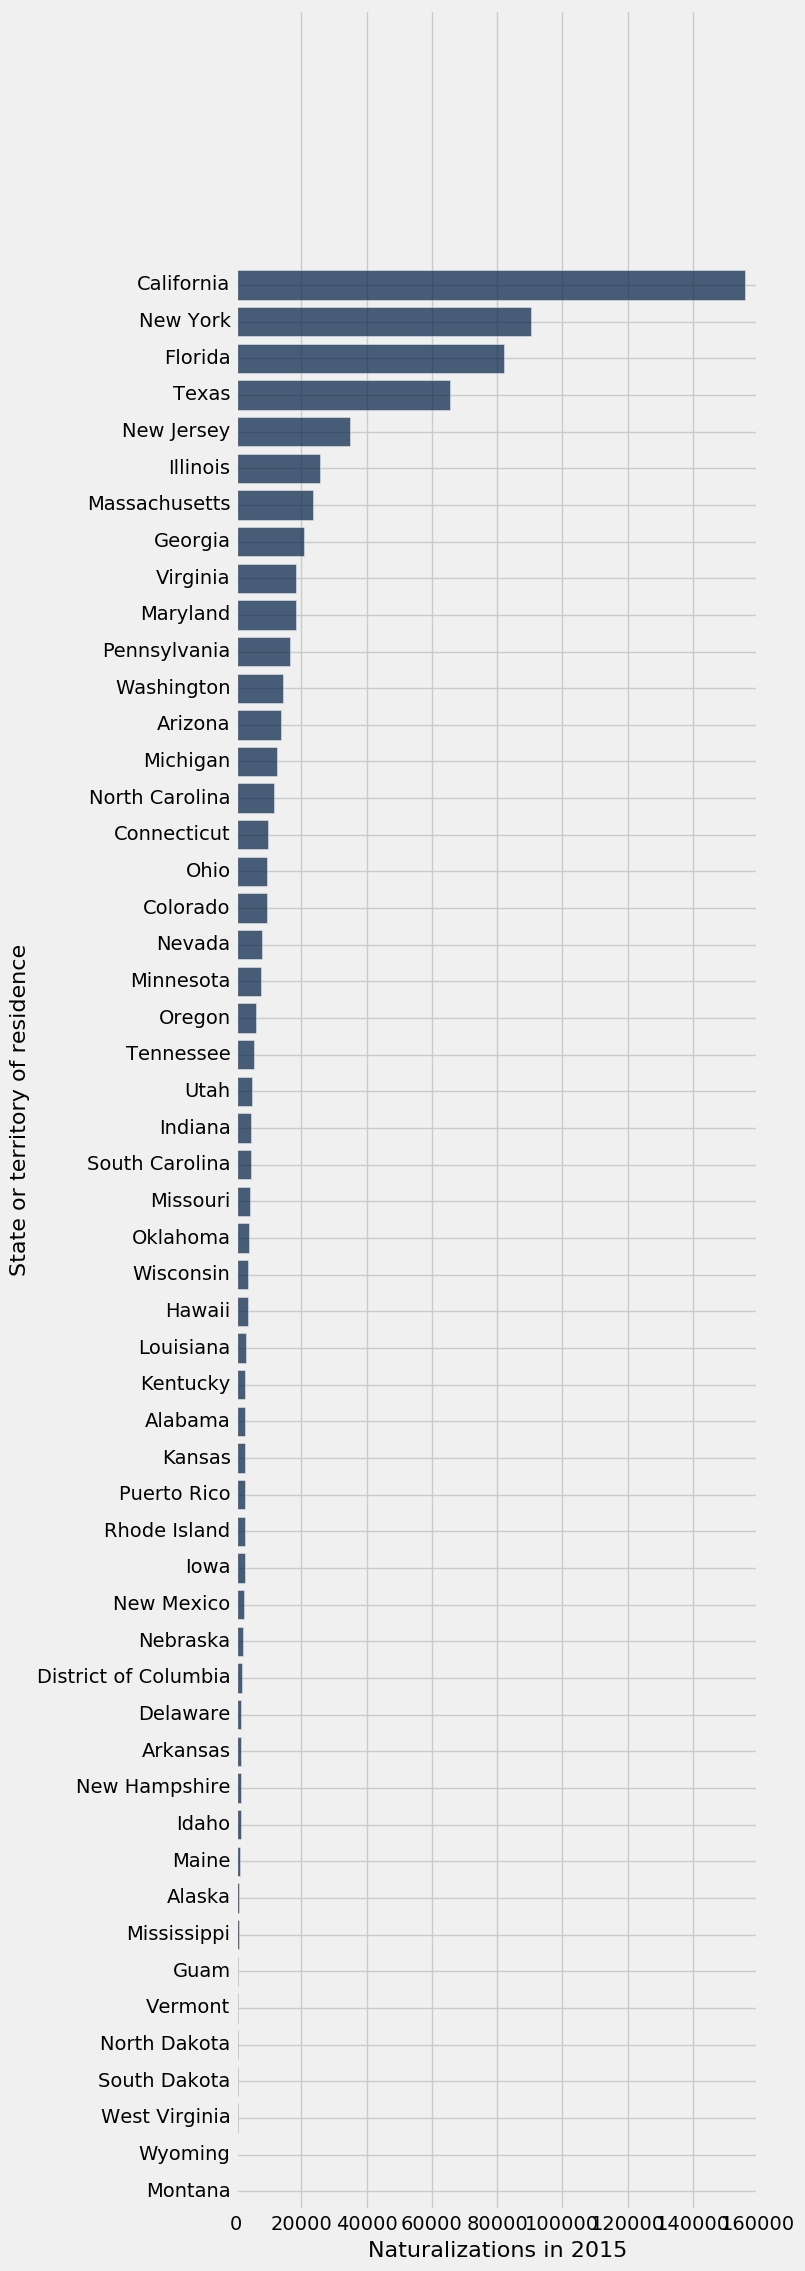

In [18]:
naturalizations_by_state = Table.read_table('naturalizations_by_state.csv')
naturalizations_by_state.sort('Naturalizations in 2015', descending = True).barh('State or territory of residence', 'Naturalizations in 2015')

Now, we'll make our own bar charts!

In the following cell, load the data table `naturalizations_by_region.csv` and make a bar chart of the number of naturalized people per region in 2015. Here is the syntax for creating bar charts:

`table_name.barh('categorical_variable_name', 'numerical_variable_name')`

Note that you may have to first examine the table to check variable names.

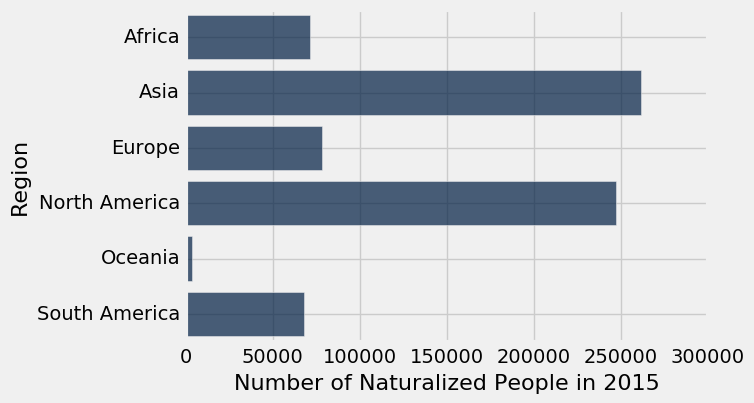

In [19]:
by_region = Table.read_table('naturalizations_by_region.csv')
by_region.barh('Region', 'Number of Naturalized People in 2015')

As you have more bars in your chart (like we did with the states), it may be helpful to sort the data before you create your visualization. In the cell below, sort the data in whatever order makes the most sense to you and then create a bar chart. Feel free to play around with this!

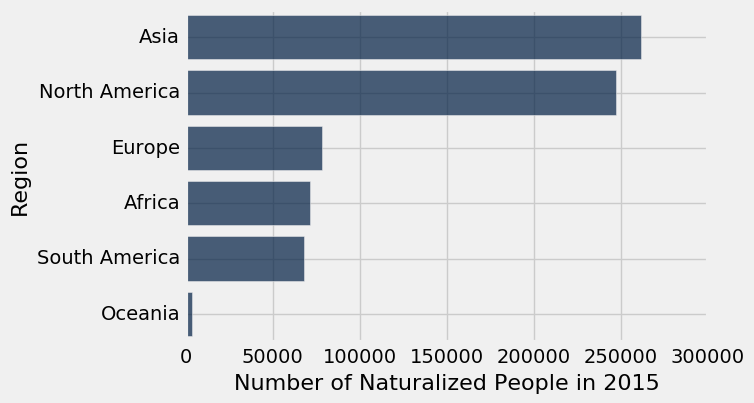

In [20]:
by_region.sort('Number of Naturalized People in 2015', descending = True).barh('Region', 'Number of Naturalized People in 2015')

Personally, we find that sorting in descending order of numerical order makes your bar chart the easiest to understand.

Now, answer the following question:
Does this bar chart suggest that people from Asia are favored more when it comes to naturalization? If not, what other information are we missing?

Answer: 

## Histograms

Lastly, we'll be covering histograms. Histograms are similar to bar charts, except they help us visualize proportions as opposed to absolute numbers. First, we'll take a look at a histogram, then we'll talk more about them.

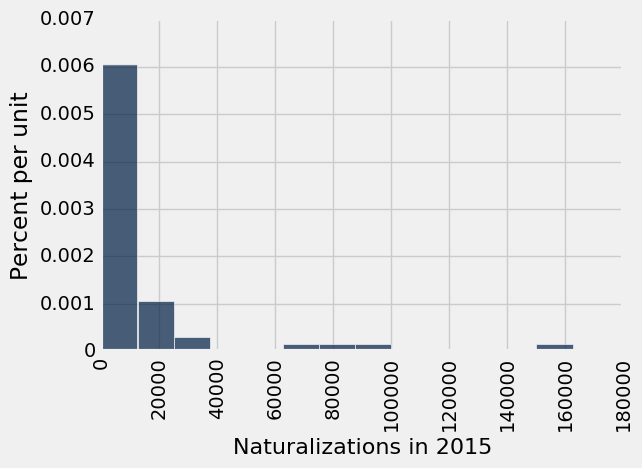

In [21]:
naturalizations_by_state.hist('Naturalizations in 2015', bins = np.arange(0, 162501, 12500))

Let's note a few things.
1. This looks like a bar chart. **It is not**. Histograms cover proportions, whereas bar charts cover counts of things. Furthermore, histograms have different axes. 
2. The x-axis concerns numerical data that has been broken up into bins. In this case, our x-axis represents the number of naturalizations, and our data has been grouped into bins based on the number of naturalizations (our first bin represents values from 0-12500, our next one goes from 12500-25000, etc).  
3. The y-axis is also made up of numerical data, but it's represented as a density scale. Note the units carefully: it represents the percent per unit. We'll go over how to calculate these in further depth in the next cell. 
4. The areas of all the bars add up to 1. 

We can think of the data our y-axis is based on as the counts of our bins. In this case, our bins are 0-12500, 12500-25000, etc. The counts of each bin would be the number of states (or more generally, rows in our data frame) for which the number of naturalizations fall into these bins. The cell below has a table showing how many states fall into each bin.

In [22]:
bins = naturalizations_by_state.bin('Naturalizations in 2015', bins = np.arange(0, 162501, 12500))
bins

bin,Naturalizations in 2015 count
0,40
12500,7
25000,2
37500,0
50000,0
62500,1
75000,1
87500,1
100000,0
112500,0


Note that each bin is only marked by its starting value. So, the row corresponding to bin 0 is actually looking at values from 0-12499. The count column represents the number of states whose number of naturalizations in 2015 falls into the range of the bin.

### Calculating Heights

Now, to calculate the height of each bar. The general formula is as follows:

`height = percentage of counts / width of bin`

As an example, let's calculate the height of the first bar, corresponding to the first bin. First, let's calculate our percentage of counts. 

There are 40 values in our first bin, and we have a total of 53 values (we counted for territories in addition to states in this dataset). Then, our percentage of counts = `(40/53) * 100 = 75.471` 

Now, the width of our bin is 12500, so we'll divide the percentage of counts from the first part by 12500 to get the height of our bin. Our height = `75.471 / 12500 = 0.006`

This height is consistent with the height we see on our graph. 


Now, we want you to practice calculating the height of bins. We've created a table for you called bins, which contains the counts in each bin. Add a column to this table called `height of bin` containing the calculated height of bin. Remember, to add a column, use `table.with_column('column name', corresponding_array)`

We've provided some skeleton to guide you. You need not use it.

In [23]:
count_per_bin = bins.column('Naturalizations in 2015 count')
total_territories = 53
bin_width = 12500
height_per_bin = ((count_per_bin / total_territories) * 100) / bin_width
bins.with_column('Height', height_per_bin)

bin,Naturalizations in 2015 count,Height
0,40,0.00603774
12500,7,0.0010566
25000,2,0.000301887
37500,0,0
50000,0,0
62500,1,0.000150943
75000,1,0.000150943
87500,1,0.000150943
100000,0,0
112500,0,0


Good job! That'll wrap up today's work. Next week, we'll be reviewing histograms and giving you more practice creating your own histograms. Before you leave, please fill out this feedback [survey](.